In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

import pmdarima as pm

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")  

In [2]:
# get the data 

!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2024-04-11 12:42:37--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: 'perrin-freres-monthly-champagne.csv'

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2024-04-11 12:42:38 (5.20 MB/s) - 'perrin-freres-monthly-champagne.csv' saved [1598/1598]



In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col = 0, parse_dates=True)

df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [5]:
col = df.columns.to_list()[0]

In [6]:
df.rename(columns={col : 'Sales'}, inplace =True)

df.head()

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [7]:
df.isna()

,Sales
Month,
1964-01,False
1964-02,False
1964-03,False
1964-04,False
1964-05,False
...,...
1972-07,False
1972-08,False
1972-09,False


In [8]:
df.isna().sum()

Sales    2
dtype: int64

In [9]:
# two missing rows at the tail of the df 

df.tail()

,Sales
Month,
1972-07,4298.0
1972-08,1413.0
1972-09,5877.0
NaN,NaN
Perrin Freres monthly champagne sales millions ?64-?72,NaN


In [10]:
# drop them 

sales = df.dropna()

sales.head()

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [11]:
sales = sales.reset_index() # first reset the index because we need to modify the data type of the Month column 

sales.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
sales['Month'] = pd.to_datetime(sales['Month']) 

sales.set_index('Month', inplace=True)

sales.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
# set the frequency of the index 
sales.index.freq = 'MS'

In [19]:
# now it is date time with a specified frequency 
sales.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq='MS')

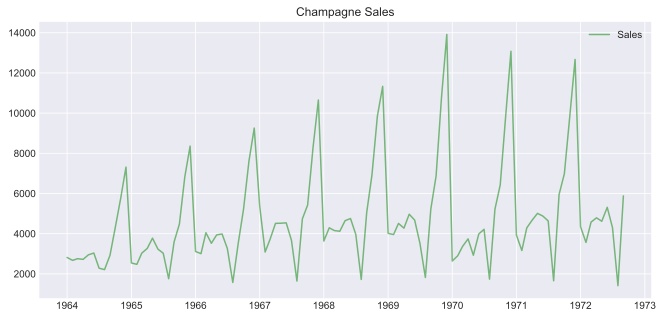

In [13]:
# plot to see the data 

fig, axes = plt.subplots(figsize = (11,5))

axes.plot(sales.index, sales['Sales'], color = 'green', alpha = 0.5, label = 'Sales')

axes.set_title('Champagne Sales')
axes.legend()
axes.grid()

<Axes: xlabel='Month'>

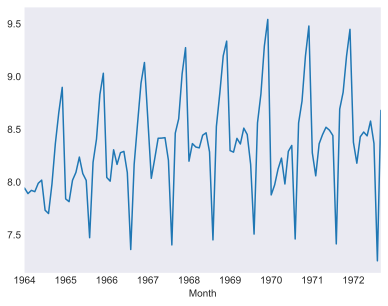

In [14]:
sales['LogSales'] = np.log(sales['Sales'])

sales['LogSales'].plot()

We have monthly sales data where seasonality is apparent with a somewhat increasing trend until a certain point. 

In [20]:
# train - test split 

Ntest = 12

train = sales[:-Ntest]
test = sales[-Ntest:]

test.head()

,Sales
Month,
1971-10-01,6981.0
1971-11-01,9851.0
1971-12-01,12670.0
1972-01-01,4348.0
1972-02-01,3564.0


In [16]:
# Train 

model = pm.auto_arima(train['Sales'], suppress_warnings=True, trace = True, seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.675, Time=0.35 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.06 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=0.41 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.09 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.15 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=0.16 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=0.19 sec
 ARIMA(0,0,1)(0,1,0

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   93
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -652.826
Date:                             Thu, 11 Apr 2024   AIC                           1313.652
Time:                                     14:34:51   BIC                           1323.230
Sample:                                 01-01-1964   HQIC                          1317.495
                                      - 09-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    408.7009    114.298      3.576      0.000     184.681     632.720
ma.L1          0.2176      0.080      2.722      0.006       0.061       0.374
ar.S.L12      -0.1969      0.090     -2.192      0.028      -0.373      -0.021
sigma2      5.616e+05   6.97e+04      8.058      0.000    4.25e+05    6.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 5.40
Prob(Q):                              0.52   Prob(JB):                         0.07
Heteroskedasticity (H):               2.22   Skew:                            -0.23
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

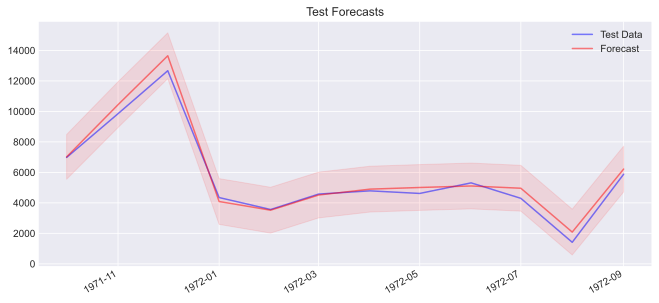

In [19]:
test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

fig, axes = plt.subplots(figsize = (11,5))

axes.plot(test.index, test['Sales'], color = 'blue', alpha = 0.5, label = 'Test Data')
test_pred.plot(ax = axes, color = 'red', alpha = 0.5, label = 'Forecast')

axes.fill_between(test.index, conf_int[:,0], conf_int[:,1], color = 'red', alpha = 0.1)

axes.set_title('Test Forecasts')

axes.grid()
axes.legend()



The predictions look pretty good! 

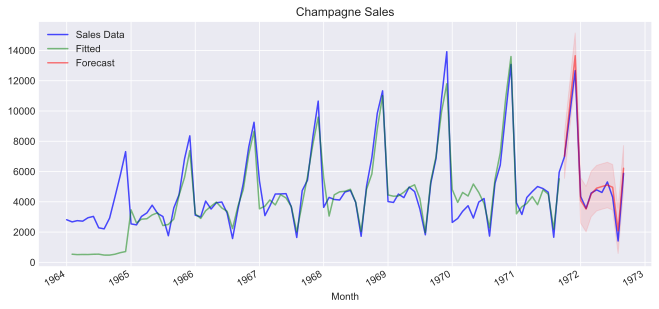

In [20]:
# lets also get the full data and predictions together 

train_pred = model.predict_in_sample(start = 1, end = -1)

fig, axes = plt.subplots(figsize = (11,5))

axes.plot(sales.index, sales['Sales'], color = 'blue', alpha = 0.7, label = 'Sales Data')

train_pred.plot(ax = axes, color = 'green', alpha = 0.5, label = 'Fitted')

test_pred.plot(ax = axes, color = 'red', alpha = 0.5, label = 'Forecast')
axes.fill_between(test.index, conf_int[:,0], conf_int[:,1], color = 'red', alpha = 0.1)

axes.set_title('Champagne Sales')

axes.grid()
axes.legend()

In [28]:
# helper function to visualize predictions 

def plot_pred(model, data, train, test, d):

    train_predict = model.predict_in_sample(start = d, end = -1)
    test_predict, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, axes = plt.subplots(1,2,figsize = (15,4))


    # global view of all data and predictions 
    
    axes[0].plot(data.index, data, color = 'blue', alpha =0.7, label = 'Data')
    axes[0].plot(train.index[d:], train_predict, color = 'orange', alpha =0.5, label = 'Fitted')
    axes[0].plot(test.index, test_predict, color = 'red', alpha =0.5, label = 'Forecast')
    axes[0].fill_between(test.index, conf_int[:,0], conf_int[:,1], color = 'red', alpha = 0.1)

    # plot test data and predictions 

    axes[1].plot(test.index, test, color = 'blue', alpha =0.7, label = 'Test Data')
    axes[1].plot(test.index, test_predict, color = 'red', alpha =0.5, label = 'Forecast')
    axes[1].fill_between(test.index, conf_int[:,0], conf_int[:,1], color = 'red', alpha = 0.1)

    for i in range(0,2):

        axes[i].grid()
        axes[i].legend()



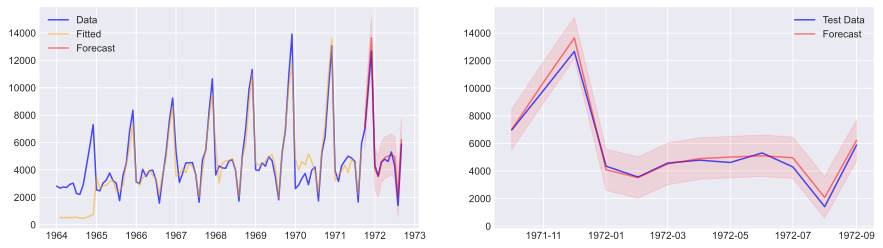

In [29]:
# test the helper function 

plot_pred(model, sales['Sales'], train, test['Sales'], 1)

In [30]:
# Lets try log transformed data 

log_model = pm.auto_arima(train['LogSales'], suppress_warnings=True, trace = True, seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.351, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=0.31 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.27 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.12 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.31 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.12 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=0.26 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.05 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [31]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  33.917
Date:                            Thu, 11 Apr 2024   AIC                            -57.834
Time:                                    14:53:41   BIC                            -45.862
Sample:                                01-01-1964   HQIC                           -53.031
                                     - 09-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.011      0.773      0.439      -0.013       0.029
ar.L1          0.8621      0.160      5.387      0.000       0.548       1.176
ma.L1         -0.6698      0.220     -3.047      0.002      -1.101      -0.239
ma.S.L12      -0.4795      0.116     -4.119      0.000      -0.708      -0.251
sigma2         0.0244      0.003      8.574      0.000       0.019       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As compared to the previous model SARIMA: $(0,0,1) \times (1,1,0)$, for the log transformed data, the best model is SARIMA: $(1,0,1) \times (0,1,1)$ and therefore has one extra parameter. 

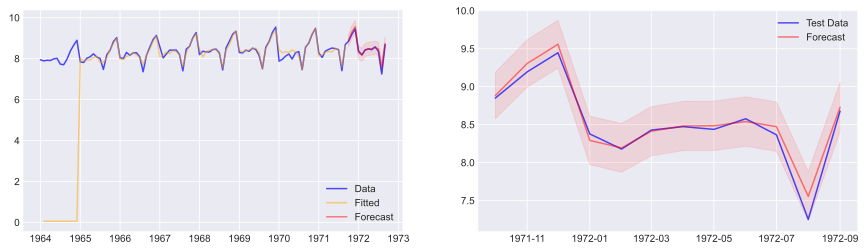

In [32]:
plot_pred(log_model, sales['LogSales'], train, test['LogSales'], 1)

In [33]:
# Hard to tell the difference, lets compare the RMSE and R^2 for these models 

test_predict, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)
ltest_predict, conf_int = log_model.predict(n_periods=Ntest, return_conf_int=True)

In [37]:
print(f"Test RMSE for SARIMA: (0,0,1)*(1,1,0) : {mean_squared_error(test['Sales'],test_predict,squared=False):.3f}")
print(f"Test RMSE for logged SARIMA: (1,0,1)*(0,1,1) : {mean_squared_error(test['Sales'],np.exp(ltest_predict),squared=False):.3f}")

Test RMSE for SARIMA: (0,0,1)*(1,1,0) : 464.691
Test RMSE for logged SARIMA: (1,0,1)*(0,1,1) : 607.158


In [39]:
print(f"Test R^2 for SARIMA: (0,0,1)*(1,1,0) : {r2_score(test['Sales'],test_predict):.3f}")
print(f"Test R^2 logged SARIMA: (1,0,1)*(0,1,1) : {r2_score(test['Sales'],np.exp(ltest_predict)):.3f}")

Test R^2 for SARIMA: (0,0,1)*(1,1,0) : 0.973
Test R^2 logged SARIMA: (1,0,1)*(0,1,1) : 0.955


It seems like the simpler model applied on the original data performs better! 

In [64]:
# We can as well work with a non-seasonal model and make a grid search to find the best model 

ns_model = pm.auto_arima(train['Sales'], trace = True, max_p = 12, max_q= 2, max_order = 15, suppress_warnings=True, stepwise=False, seasonal = False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1709.518, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1710.060, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1710.821, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1707.549, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1706.909, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1686.873, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1692.374, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1693.791, Time=0.06 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1680.176, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AI

In [65]:
ns_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:              SARIMAX(11, 1, 1)   Log Likelihood                -764.422
Date:                Thu, 11 Apr 2024   AIC                           1556.843
Time:                        15:49:23   BIC                           1592.148
Sample:                    01-01-1964   HQIC                          1571.092
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    310.5227    129.283      2.402      0.016      57.134     563.912
ar.L1         -0.8863      0.094     -9.468      0.000      -1.070      -0.703
ar.L2         -0.9363      0.051    -18.344      0.000      -1.036      -0.836
ar.L3         -0.8929      0.063    -14.103      0.000      -1.017      -0.769
ar.L4         -0.9681      0.051    -19.105      0.000      -1.067      -0.869
ar.L5         -0.9054      0.095     -9.550      0.000      -1.091      -0.720
ar.L6         -0.9426      0.083    -11.397      0.000      -1.105      -0.781
ar.L7         -0.8746      0.087    -10.006      0.000      -1.046      -0.703
ar.L8         -0.9647      0.052    -18.673      0.000      -1.066      -0.863
ar.L9         -0.8962      0.074    -12.164      0.000      -1.041      -0.752
ar.L10        -0.9142      0.046    -20.082      0.000      -1.003      -0.825
ar.L11        -0.8627      0.052    -16.690      0.000      -0.964      -0.761
ma.L1          0.0946      0.171      0.553      0.581      -0.241       0.430
sigma2      5.776e+05    6.1e+04      9.467      0.000    4.58e+05    6.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                76.78
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.32
Prob(H) (two-sided):                  0.54   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

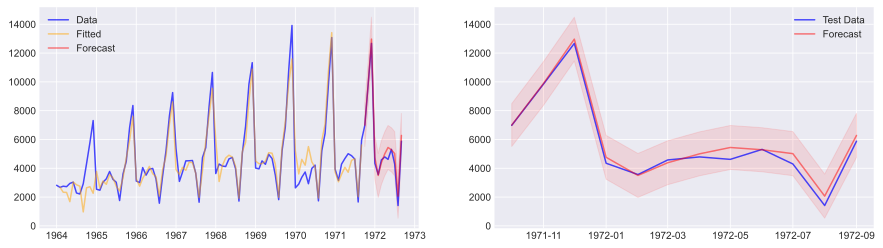

In [66]:
plot_pred(ns_model, sales['Sales'], train, test['Sales'], 1)

In [67]:
# grid search using the logged data 

ns_log_model = pm.auto_arima(train['LogSales'], trace = True, max_p = 12, max_q= 2, max_order = 15, suppress_warnings=True, stepwise=False, seasonal = False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.07 

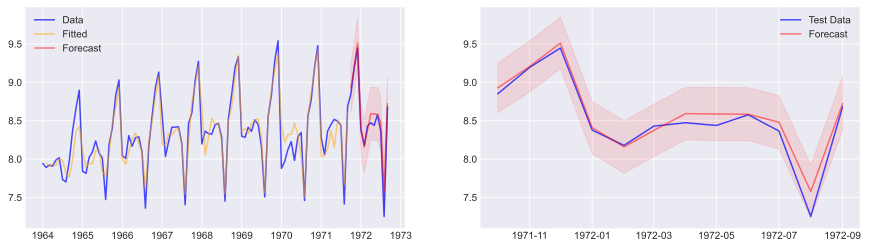

In [49]:
plot_pred(ns_log_model, sales['LogSales'], train, test['LogSales'], 1)

In [51]:
# Hard to tell the difference, lets compare the RMSE and R^2 for these models 

test_predict, conf_int = ns_model.predict(n_periods=Ntest, return_conf_int=True)
ltest_predict, conf_int = ns_log_model.predict(n_periods=Ntest, return_conf_int=True)

print(f"Test RMSE for ARIMA: (11,1,1) : {mean_squared_error(test['Sales'],test_predict,squared=False):.3f}")
print(f"Test RMSE for logged ARIMA: (12,1,1) : {mean_squared_error(test['Sales'],np.exp(ltest_predict),squared=False):.3f}")

print(f"Test R^2 for ARIMA: (11,1,1) : {r2_score(test['Sales'],test_predict):.3f}")
print(f"Test R^2 logged ARIMA: (12,1,1) : {r2_score(test['Sales'],np.exp(ltest_predict)):.3f}")

Test RMSE for ARIMA: (11,1,1) : 421.013
Test RMSE for logged ARIMA: (12,1,1) : 474.666
Test R^2 for ARIMA: (11,1,1) : 0.978
Test R^2 logged ARIMA: (12,1,1) : 0.972


Non-seasonal $\textrm{ARIMA}(11,1,1)$ performs better than the $\textrm{ARIMA}(12,1,1)$ on the logged data. It does also perform better than its seasonal counterpart, however the information we gain by using a much complex model (i.e $\textrm{ARIMA}(11,1,1)$ vs $\textrm{SARIMA}(0,0,1)\times(1,1,0)$) is not much!

In [1]:
# Lets try to choose the model manually using acf and pacf 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller

In [13]:
# differenced time series is stationary 

adfuller(sales['Sales'].diff().dropna())

(-7.189896448050993,
 2.5196204473871814e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915888)

It makes sense to focus on $d = 1$

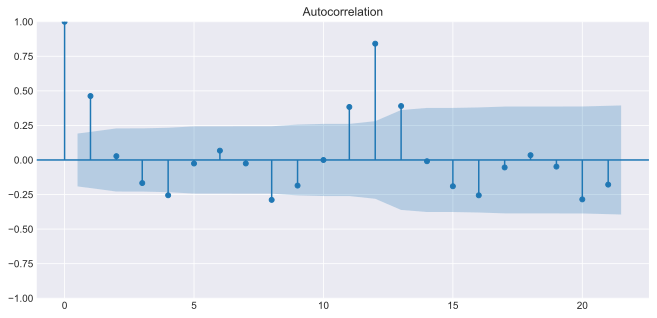

In [14]:
fig, axes = plt.subplots(figsize = (11,5))

plot_acf(sales['Sales'], ax = axes);

axes.grid()

Although there are significant points around $q = 12$, $q = 1$ is more reasonable choice here as the seasonal pattern is clear! It is not common to see models with large values for $q$.  

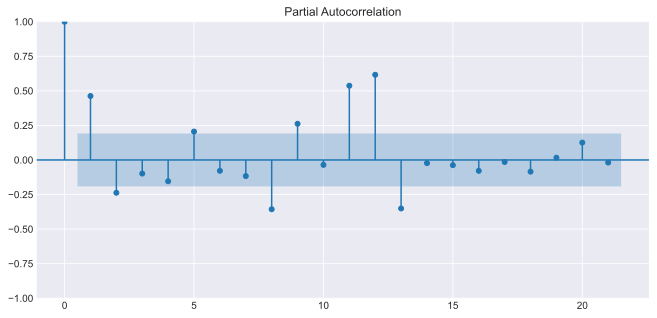

In [15]:
fig, axes = plt.subplots(figsize = (11,5))

plot_pacf(sales['Sales'], ax = axes);

axes.grid()

Now we see various points that are significant upto $p = 12$, so it makes sense to choose $p =11$. 

In [40]:
def plot_fit_and_forecast(result, d=0, col = 'Sales'):

    fig, axes = plt.subplots(figsize = (11,5))

    axes.plot(sales[col], color = 'blue', alpha = 0.7, label = 'Data')

    # plot the fitted values 

    train_pred = result.fittedvalues
    axes.plot(train[col].index[d:], train_pred[d:], color = 'orange', label = 'Fitted')

    # Forecast 

    prediction_res = result.get_forecast(Ntest)

    conf_int = prediction_res.conf_int()

    lc_int, uc_int = conf_int[f"lower {col}"], conf_int[f"upper {col}"]

    forecast = prediction_res.predicted_mean

    axes.plot(test.index, forecast, color = 'red', label = "Forecast")

    axes.fill_between(test.index, lc_int, uc_int, color = 'red', alpha = 0.1)

    axes.legend()
    axes.grid()

    return forecast


In [41]:
# manual arima 

arima = ARIMA(train['Sales'], order = (11,1,1))
arima_res = arima.fit()



/opt/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


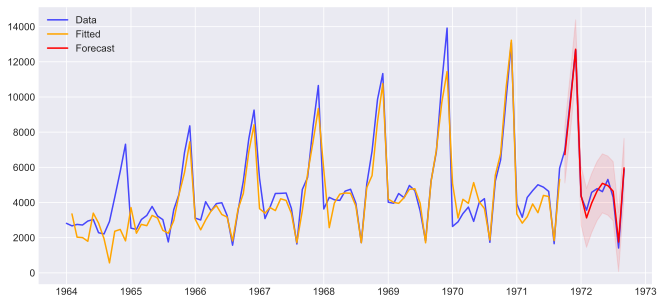

In [42]:
forecasts = plot_fit_and_forecast(arima_res, d = 1)

In [43]:
r2_score(test['Sales'], forecasts)

0.9868383305907543